In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-01-15 04:53:19.441299


In [ ]:
# Check for GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-15 04:53:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-15 04:53:22 (97.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('spam_ham_train.csv')

# Display the first few rows of the DataFrame
df.head()


,id,keyword,location,text,target
0,f635f780a0ead39a,NaN,NaN,""" 2007 (UTC)\n\n TedFrank, your response here ...",0
1,4551,keyword1,location3,"Haha, my friend tyler literally just asked if ...",0
2,5520,keyword3,location2,Can you pls send me that company name. In saib...,0
3,3323,keyword2,location1,Yo im right by yo work,0
4,18d9089ff06204c1,NaN,NaN,Cocksucker \n\nBILLCJ YOU ARE A COMPLETE FUCKF...,1


In [ ]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("spam_ham_train.csv")
test_df = pd.read_csv("spam_ham_test.csv")
train_df.head()

,id,keyword,location,text,target
0,f635f780a0ead39a,NaN,NaN,""" 2007 (UTC)\n\n TedFrank, your response here ...",0
1,4551,keyword1,location3,"Haha, my friend tyler literally just asked if ...",0
2,5520,keyword3,location2,Can you pls send me that company name. In saib...,0
3,3323,keyword2,location1,Yo im right by yo work,0
4,18d9089ff06204c1,NaN,NaN,Cocksucker \n\nBILLCJ YOU ARE A COMPLETE FUCKF...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
1,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
2,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
3,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
4,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2753,bb167d7f6820a7f3,NaN,NaN,Wikia property\nThe status of Uncyc. as wikia ...,1
1595,47369e6eb0cf0950,NaN,NaN,Possible Improvement \n\nIt would be nice if w...,0
1747,27081ec9b736d49a,NaN,NaN,Dogmatic \n\nThe use of the word dogmatic in r...,0
866,8dd4a4e7163c89f5,NaN,NaN,"""\nRepublicanJacobite is the ultimate hypocrit...",1
8131,1f299afb467f0242,NaN,NaN,OK! \n\nIM GOING TO VANDALIZE WILD ONES WIKI T...,1


In [ ]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,id,keyword,location,text
0,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
1,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
2,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
3,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
4,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    5895
1    5500
Name: target, dtype: int64

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 11395
Total test samples: 1500
Total samples: 12895


In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(spam)" if target > 0 else "(ham)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (spam)
Text:
It is my religious view that she will burn in hell for all of eternity and I have a right to make that discussion. Just because you believe it is insensitive means nothing, I have a right to express my opinion like anyone on Wikipedia, even if you disagree with it. Feel free to take it to mediation or something but you have no right to remove what I am saying.

---

Target: 0 (ham)
Text:
jay says he'll put in  &lt;#&gt;

---

Target: 0 (ham)
Text:
"
 Your submission at Articles for creation 
 Jeff Peterson Memorial Cup, which you submitted to Articles for creation, has been created. The article has been assessed as C-Class, which is recorded on the article's talk page. You may like to take a look at the grading scheme to see how you can improve the article.
You are more than welcome to continue making quality contributions to Wikipedia. You may wish to consider registering an account so you can create articles yourself.
 If you have any questions, you are welcome

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(10255, 10255, 1140, 1140)

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['|listas = Phillips, Melanie',
        '"\n\n Comunist ""Agents"" acting as wikipidia moderators are in fact glorifying comunism. \n\nI am astonished at the deep diarrhoea of Communism propaganda on articles such as this one on Fidel Castro. This criminal murderous communist (let us understand that no one is a communist only a fool can be a communist). This murderer is being glorified here in this space of wikipedia. \n\nLet us (at least me), we the ones that don\'t have the power of moderators, let us uphold reason and above all truth of facts and reality, that this pig by the name of Fidel Castro is not only a communist criminal but is a devil in its own right.\n\nFor the crimes that this pig committed and the misery that this pig inflicted in nations and peoples, may the soul of Fidel Castro burn in hell for eternity.\n\nRui Gabirro, \n100% Anti Communist\n\ngabirro@gmail.com"',
        'Just nw i came to hme da..',
        "That's fine, have him give me a call if he knows w

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

45

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a fuck in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 398,    5,   21,   11,   19, 1770,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
"

Just who is stalking who here?
Anyone can get my address also. It is you who is harrassing me and I am simply defending myself trying to get you off my back. Fred Alan Wolf has been called a ""crank"" et-al by the same stupid Usenet people who call me those names and for the very same reasons. Yet, none of that defamatory slander/libel whatever is on the Wiki article on him. As soon as you remove that stuff about me, we can settle this amiably.
[Jack Sarfatti]"      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  46,   54,    9, 1982,   54,   76,  307,   36,   56,   19,  485,
          96,   12,    9,    3]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'you', 'to']
Bottom 5 least common words: ['thereafter', 'theoretically', 'thenwill', 'thatd', 'thanked']


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
I looked escaped the Kyrgyzstan, real nasty place, he real bad man      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04136788,  0.02539622, -0.03420647, ..., -0.00310607,
          0.0492525 ,  0.04387799],
        [ 0.03009612,  0.0478359 ,  0.00629596, ...,  0.01781181,
         -0.02359798, -0.02590402],
        [ 0.01210131,  0.02922418, -0.00040761, ...,  0.02289804,
         -0.04551091,  0.01591796],
        ...,
        [-0.00484465, -0.0093034 , -0.00892364, ...,  0.04870324,
         -0.02180631, -0.03330765],
        [-0.00484465, -0.0093034 , -0.00892364, ...,  0.04870324,
         -0.02180631, -0.03330765],
        [-0.00484465, -0.0093034 , -0.00892364, ...,  0.04870324,
         -0.02180631, -0.03330765]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 4.13678773e-02,  2.53962167e-02, -3.42064723e-02,  4.23592441e-02,
       -1.44708380e-02, -4.13253531e-02,  2.55403258e-02,  2.44778059e-02,
        8.53017718e-03,  4.10585478e-03, -3.95854600e-02,  3.56561579e-02,
        5.95511124e-03,  1.80459730e-02,  4.43971045e-02, -2.85991281e-03,
       -4.08962145e-02,  2.93615945e-02,  9.58410650e-03,  3.60038392e-02,
       -5.60346991e-03,  7.25601986e-03,  2.67008692e-03, -4.03463468e-02,
        2.81802155e-02,  4.99924906e-02, -3.65290418e-02,  3.19384374e-02,
       -6.39334321e-05, -1.16113424e-02,  1.19614713e-02,  3.69230658e-03,
       -9.84646007e-03,  1.82208754e-02, -1.77346095e-02,  3.96899618e-02,
       -3.62774730e-02,  3.90008725e-02,  1.98830999e-02, -4.69075702e-02,
        9.70103592e-03,  1.27640478e-02,  2.10619830e-02, -4.98379245e-02,
        3.76144797e-03,  3.45160849e-02,  1.55529119e-02,  4.81229760e-02,
       -3.69395390e-02,  1.35671161e-02,  4.84209545

Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 88.95%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 88.94736842105263,
 'precision': 0.8894252139783421,
 'recall': 0.8894736842105263,
 'f1': 0.8893498452012383}

Model 1

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240115-045331
Epoch 1/5
321/321 [==============================] - 7s 20ms/step - loss: 0.5816 - accuracy: 0.7332 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 2/5
321/321 [==============================] - 7s 23ms/step - loss: 0.3875 - accuracy: 0.8412 - val_loss: 0.3834 - val_accuracy: 0.8307
Epoch 3/5
321/321 [==============================] - 6s 19ms/step - loss: 0.2927 - accuracy: 0.8856 - val_loss: 0.3597 - val_accuracy: 0.8281
Epoch 4/5
321/321 [==============================] - 7s 23ms/step - loss: 0.2350 - accuracy: 0.9127 - val_loss: 0.3561 - val_accuracy: 0.8377
Epoch 5/5
321/321 [==============================] - 6s 20ms/step - loss: 0.1937 - accuracy: 0.9294 - val_loss: 0.3598 - val_accuracy: 0.8456


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

36/36 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8456


[0.3597867488861084, 0.8456140160560608]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01194163,  0.00669516, -0.0260199 , ...,  0.03438895,
         -0.03894087, -0.01860881],
        [ 0.01492115,  0.03700199,  0.03416773, ...,  0.0140932 ,
         -0.00939629,  0.03446785],
        [ 0.03204699,  0.05798898, -0.0039538 , ..., -0.01440729,
         -0.03542033,  0.02512226],
        ...,
        [ 0.02997314,  0.00268004, -0.02402622, ..., -0.03256062,
          0.0358582 , -0.00760404],
        [-0.02308761,  0.04738409,  0.04873358, ..., -0.03891174,
         -0.01003792,  0.03297618],
        [ 0.04088232, -0.04279062, -0.03470675, ...,  0.01101702,
         -0.01721021,  0.04184072]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

36/36 [==============================] - 0s 2ms/step


array([[0.99944466],
       [0.04863268],
       [0.05893452],
       [0.98004353],
       [0.0626931 ],
       [0.13093749],
       [0.24382131],
       [0.99962753],
       [0.32417223],
       [0.6166237 ]], dtype=float32)

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 84.56140350877193,
 'precision': 0.8461900336045336,
 'recall': 0.8456140350877193,
 'f1': 0.8449439701151988}

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))


array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 88.95, New accuracy: 84.56, Difference: -4.39
Baseline precision: 0.89, New precision: 0.85, Difference: -0.04
Baseline recall: 0.89, New recall: 0.85, Difference: -0.04
Baseline f1: 0.89, New f1: 0.84, Difference: -0.04


In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'you', 'to', 'a', 'i', 'and', 'of', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [ ]:
 # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
 import io

 # Create output writers
 out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
 out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

 # Write embedding vectors and words to file
 for num, word in enumerate(words_in_vocab):
   if num == 0:
      continue # skip padding token
   vec = embed_weights[num]
   out_m.write(word + "\n") # write words to file
   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
 out_v.close()
 out_m.close()

 # Download files locally to upload to Embedding Projector
 try:
   from google.colab import files
 except ImportError:
   pass
 else:
   files.download("embedding_vectors.tsv")
   files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 2

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240115-045415
Epoch 1/5
321/321 [==============================] - 14s 36ms/step - loss: 0.4522 - accuracy: 0.7774 - val_loss: 0.3671 - val_accuracy: 0.8307
Epoch 2/5
321/321 [==============================] - 11s 33ms/step - loss: 0.2531 - accuracy: 0.8939 - val_loss: 0.3506 - val_accuracy: 0.8395
Epoch 3/5
321/321 [==============================] - 11s 33ms/step - loss: 0.1640 - accuracy: 0.9367 - val_loss: 0.4356 - val_accuracy: 0.8289
Epoch 4/5
321/321 [==============================] - 9s 29ms/step - loss: 0.1045 - accuracy: 0.9604 - val_loss: 0.5099 - val_accuracy: 0.8184
Epoch 5/5
321/321 [==============================] - 11s 34ms/step - loss: 0.0725 - accuracy: 0.9733 - val_loss: 0.6171 - val_accuracy: 0.8281


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

36/36 [==============================] - 1s 8ms/step


((1140, 1),
 array([[9.9991417e-01],
        [1.6824612e-03],
        [4.7950963e-03],
        [9.9985707e-01],
        [2.3428745e-04],
        [5.2264947e-01],
        [3.0863483e-02],
        [9.9996674e-01],
        [2.7360052e-03],
        [8.9269656e-01]], dtype=float32))

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 82.80701754385966,
 'precision': 0.8279335593886678,
 'recall': 0.8280701754385965,
 'f1': 0.8279787720230932}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 88.95, New accuracy: 82.81, Difference: -6.14
Baseline precision: 0.89, New precision: 0.83, Difference: -0.06
Baseline recall: 0.89, New recall: 0.83, Difference: -0.06
Baseline f1: 0.89, New f1: 0.83, Difference: -0.06


Model 3

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240115-045541
Epoch 1/5
321/321 [==============================] - 13s 34ms/step - loss: 0.4694 - accuracy: 0.7602 - val_loss: 0.3694 - val_accuracy: 0.8228
Epoch 2/5
321/321 [==============================] - 9s 28ms/step - loss: 0.2559 - accuracy: 0.8943 - val_loss: 0.3559 - val_accuracy: 0.8333
Epoch 3/5
321/321 [==============================] - 11s 33ms/step - loss: 0.1702 - accuracy: 0.9352 - val_loss: 0.4259 - val_accuracy: 0.8254
Epoch 4/5
321/321 [==============================] - 11s 33ms/step - loss: 0.1089 - accuracy: 0.9598 - val_loss: 0.5505 - val_accuracy: 0.8263
Epoch 5/5
321/321 [==============================] - 10s 32ms/step - loss: 0.0726 - accuracy: 0.9741 - val_loss: 0.5183 - val_accuracy: 0.8219


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

36/36 [==============================] - 1s 5ms/step


((1140, 1),
 array([[9.9981850e-01],
        [2.6998219e-01],
        [1.5356761e-01],
        [9.9933815e-01],
        [2.6173377e-04],
        [3.5902392e-02],
        [4.5403477e-02],
        [9.9984485e-01],
        [5.3603360e-03],
        [7.9105705e-01]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 82.19298245614036,
 'precision': 0.8217214510510313,
 'recall': 0.8219298245614035,
 'f1': 0.8217484905115973}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 88.95, New accuracy: 82.19, Difference: -6.75
Baseline precision: 0.89, New precision: 0.82, Difference: -0.07
Baseline recall: 0.89, New recall: 0.82, Difference: -0.07
Baseline f1: 0.89, New f1: 0.82, Difference: -0.07


Model 4

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240115-045707
Epoch 1/5
321/321 [==============================] - 20s 47ms/step - loss: 0.4421 - accuracy: 0.7863 - val_loss: 0.3617 - val_accuracy: 0.8412
Epoch 2/5
321/321 [==============================] - 14s 44ms/step - loss: 0.2464 - accuracy: 0.8995 - val_loss: 0.3557 - val_accuracy: 0.8316
Epoch 3/5
321/321 [==============================] - 14s 43ms/step - loss: 0.1563 - accuracy: 0.9396 - val_loss: 0.4173 - val_accuracy: 0.8342
Epoch 4/5
321/321 [==============================] - 14s 44ms/step - loss: 0.0967 - accuracy: 0.9652 - val_loss: 0.5275 - val_accuracy: 0.8219
Epoch 5/5
321/321 [==============================] - 14s 44ms/step - loss: 0.0712 - accuracy: 0.9742 - val_loss: 0.6537 - val_accuracy: 0.8325


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

36/36 [==============================] - 2s 9ms/step


array([[9.9990791e-01],
       [1.0193295e-03],
       [4.8477162e-02],
       [9.9988902e-01],
       [3.4565269e-04],
       [3.4142964e-02],
       [1.8001066e-03],
       [9.9998266e-01],
       [5.3998665e-04],
       [9.1760033e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)>

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 83.24561403508773,
 'precision': 0.8323810589738568,
 'recall': 0.8324561403508772,
 'f1': 0.8324127992373633}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 88.95, New accuracy: 83.25, Difference: -5.70
Baseline precision: 0.89, New precision: 0.83, Difference: -0.06
Baseline recall: 0.89, New recall: 0.83, Difference: -0.06
Baseline f1: 0.89, New f1: 0.83, Difference: -0.06


Model 5

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.0621724 , -0.04850797, -0.02803585, ...,  0.03067626,
           0.0248801 , -0.02777423],
         [-0.03755405,  0.00800279, -0.0041482 , ..., -0.00654611,
          -0.00911831,  0.0458741 ],
         [-0.06141719,  0.0054441 ,  0.03410306, ...,  0.04297196,
           0.04032729, -0.00511609],
         ...,
         [ 0.01194163,  0.00669516, -0.0260199 , ...,  0.03438895,
          -0.03894087, -0.01860881],
         [ 0.01194163,  0.00669516, -0.0260199 , ...,  0.03438895,
          -0.03894087, -0.01860881],
         [ 0.01194163,  0.00669516, -0.0260199 , ...,  0.03438895,
          -0.03894087, -0.01860881]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[8.70453194e-02, 3.59185226e-03, 0.00000000e+00, 1.07023090e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          2.46012807e-01, 1.41507268e-01, 1.01020411e-02, 0.00000000e+00,
          0.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240115-045835
Epoch 1/5
321/321 [==============================] - 8s 22ms/step - loss: 0.5043 - accuracy: 0.7478 - val_loss: 0.3730 - val_accuracy: 0.8237
Epoch 2/5
321/321 [==============================] - 8s 26ms/step - loss: 0.2739 - accuracy: 0.8896 - val_loss: 0.3580 - val_accuracy: 0.8386
Epoch 3/5
321/321 [==============================] - 7s 22ms/step - loss: 0.1606 - accuracy: 0.9435 - val_loss: 0.4038 - val_accuracy: 0.8386
Epoch 4/5
321/321 [==============================] - 8s 25ms/step - loss: 0.0916 - accuracy: 0.9706 - val_loss: 0.4696 - val_accuracy: 0.8342
Epoch 5/5
321/321 [==============================] - 8s 24ms/step - loss: 0.0505 - accuracy: 0.9862 - val_loss: 0.5290 - val_accuracy: 0.8333


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

36/36 [==============================] - 0s 5ms/step


array([[9.9999923e-01],
       [1.2673133e-03],
       [9.4565488e-02],
       [9.9999988e-01],
       [1.3429139e-04],
       [1.3915145e-02],
       [5.4940104e-02],
       [9.9999058e-01],
       [2.0157833e-02],
       [9.1235745e-01]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.33333333333334,
 'precision': 0.8336742424242424,
 'recall': 0.8333333333333334,
 'f1': 0.832657733738693}

In [ ]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 88.95, New accuracy: 83.33, Difference: -5.61
Baseline precision: 0.89, New precision: 0.83, Difference: -0.06
Baseline recall: 0.89, New recall: 0.83, Difference: -0.06
Baseline f1: 0.89, New f1: 0.83, Difference: -0.06


Model 6

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.00982705  0.03238427 -0.03104174  0.04037441  0.02966517  0.02784401
 -0.01479441  0.02742032 -0.0299241   0.00754957 -0.02428642 -0.02191172
 -0.00623092  0.10449115  0.00417974 -0.06973658  0.00770808 -0.00611351
 -0.00401639 -0.08352943 -0.00812616 -0.03904727 -0.00013163 -0.02246787
 -0.05621985 -0.00273415  0.07752703 -0.06051603 -0.03481648  0.0654614
  0.00419827 -0.01092643  0.00390858  0.0146431   0.02401788 -0.06800433
  0.0567361   0.0482774  -0.03090527 -0.05531143  0.04806939  0.05837027
 -0.01289087  0.02400962 -0.10516107 -0.01181295 -0.06882656 -0.05222664
  0.02367337  0.04817969], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240115-045956
Epoch 1/5
321/321 [==============================] - 15s 35ms/step - loss: 0.3949 - accuracy: 0.8367 - val_loss: 0.2737 - val_accuracy: 0.8904
Epoch 2/5
321/321 [==============================] - 9s 27ms/step - loss: 0.2834 - accuracy: 0.8768 - val_loss: 0.2589 - val_accuracy: 0.8965
Epoch 3/5
321/321 [==============================] - 10s 32ms/step - loss: 0.2684 - accuracy: 0.8855 - val_loss: 0.2553 - val_accuracy: 0.9035
Epoch 4/5
321/321 [==============================] - 10s 32ms/step - loss: 0.2585 - accuracy: 0.8893 - val_loss: 0.2523 - val_accuracy: 0.9018
Epoch 5/5
321/321 [==============================] - 11s 33ms/step - loss: 0.2482 - accuracy: 0.8950 - val_loss: 0.2508 - val_accuracy: 0.9035


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

36/36 [==============================] - 1s 24ms/step


array([[0.99334323],
       [0.04031249],
       [0.13454646],
       [0.9870011 ],
       [0.02324182],
       [0.97967464],
       [0.10362401],
       [0.9769617 ],
       [0.07309019],
       [0.3417588 ]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 90.35087719298247,
 'precision': 0.9034814008828961,
 'recall': 0.9035087719298246,
 'f1': 0.9034922841083289}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 88.95, New accuracy: 90.35, Difference: 1.40
Baseline precision: 0.89, New precision: 0.90, Difference: 0.01
Baseline recall: 0.89, New recall: 0.90, Difference: 0.01
Baseline f1: 0.89, New f1: 0.90, Difference: 0.01


Model 7

In [ ]:
## NOTE: Making splits like this will lead to data leakage ###
## (some of the training examples in the validation set) ###

## WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###

 # Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(1140, 1140)

In [ ]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 10255
Length of 10% training examples: 1026


In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    520
1    506
dtype: int64

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240115-050131
Epoch 1/5
33/33 [==============================] - 6s 80ms/step - loss: 0.6531 - accuracy: 0.7251 - val_loss: 0.5991 - val_accuracy: 0.8132
Epoch 2/5
33/33 [==============================] - 2s 63ms/step - loss: 0.5463 - accuracy: 0.8460 - val_loss: 0.4867 - val_accuracy: 0.8465
Epoch 3/5
33/33 [==============================] - 4s 120ms/step - loss: 0.4429 - accuracy: 0.8499 - val_loss: 0.4050 - val_accuracy: 0.8500
Epoch 4/5
33/33 [==============================] - 2s 48ms/step - loss: 0.3732 - accuracy: 0.8684 - val_loss: 0.3629 - val_accuracy: 0.8561
Epoch 5/5
33/33 [==============================] - 2s 49ms/step - loss: 0.3301 - accuracy: 0.8743 - val_loss: 0.3392 - val_accuracy: 0.8614


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

36/36 [==============================] - 1s 23ms/step


array([[0.94852537],
       [0.20160632],
       [0.5306983 ],
       [0.9240105 ],
       [0.2557098 ],
       [0.89466804],
       [0.36274913],
       [0.85500544],
       [0.17657241],
       [0.39657706]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 86.14035087719299,
 'precision': 0.8630986946776421,
 'recall': 0.8614035087719298,
 'f1': 0.8616542329914012}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 88.95, New accuracy: 86.14, Difference: -2.81
Baseline precision: 0.89, New precision: 0.86, Difference: -0.03
Baseline recall: 0.89, New recall: 0.86, Difference: -0.03
Baseline f1: 0.89, New f1: 0.86, Difference: -0.03


In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,88.947368,0.889425,0.889474,0.889350
simple_dense,84.561404,0.846190,0.845614,0.844944
lstm,82.807018,0.827934,0.828070,0.827979
gru,82.192982,0.821721,0.821930,0.821748
bidirectional,83.245614,0.832381,0.832456,0.832413
conv1d,83.333333,0.833674,0.833333,0.832658
tf_hub_sentence_encoder,90.350877,0.903481,0.903509,0.903492
tf_hub_10_percent_data,86.140351,0.863099,0.861404,0.861654


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

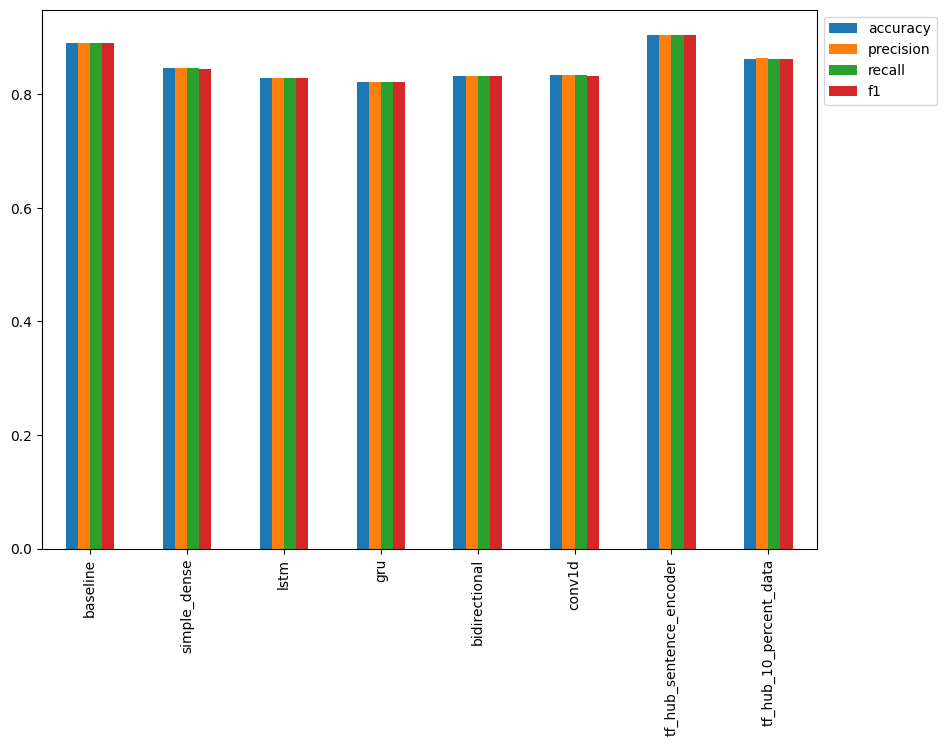

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

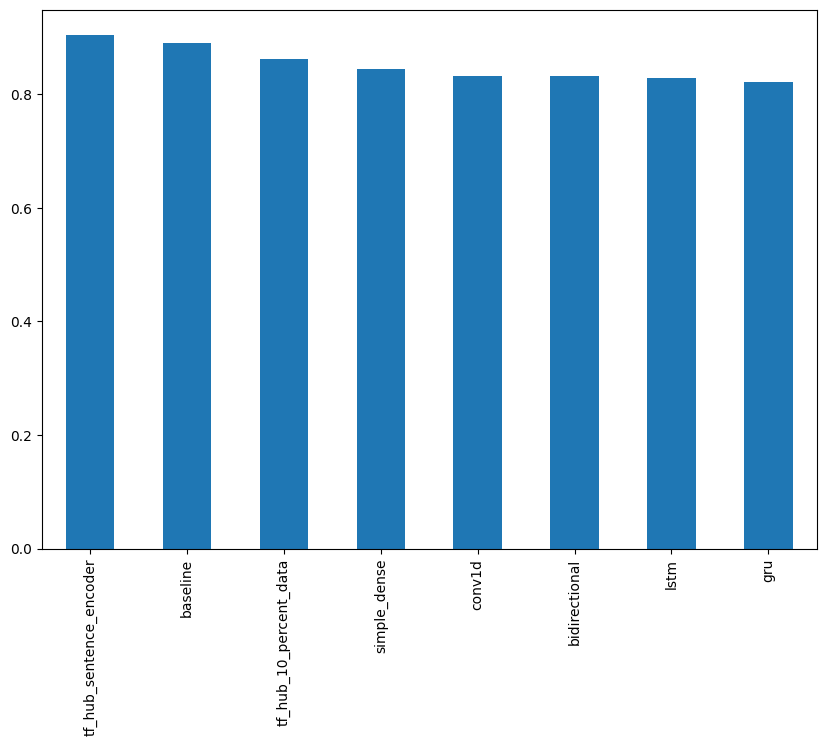

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
 # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
 # Upload TensorBoard dev records
 !tensorboard dev upload --logdir ./model_logs \
   --name "NLP modelling experiments" \
   --description "A series of different NLP modellings experiments with various models" \
   --one_shot # exits the uploader when upload has finished

2024-01-15 05:01:59.177034: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 05:01:59.177126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 05:01:59.182015: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 05:02:00.642635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 87.28070175438597,
 'precision': 0.8756040829907962,
 'recall': 0.8728070175438597,
 'f1': 0.8730768006920276}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.889474,0.889425,0.889474,0.889350
simple_dense,0.845614,0.846190,0.845614,0.844944
lstm,0.828070,0.827934,0.828070,0.827979
gru,0.821930,0.821721,0.821930,0.821748
bidirectional,0.832456,0.832381,0.832456,0.832413
conv1d,0.833333,0.833674,0.833333,0.832658
tf_hub_sentence_encoder,0.903509,0.903481,0.903509,0.903492
tf_hub_10_percent_data,0.861404,0.863099,0.861404,0.861654
ensemble_results,0.872807,0.875604,0.872807,0.873077


In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

36/36 [==============================] - 2s 23ms/step - loss: 0.2508 - accuracy: 0.9035


[0.2508135437965393, 0.9035087823867798]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

36/36 [==============================] - 1s 24ms/step - loss: 0.2508 - accuracy: 0.9035


[0.2508135437965393, 0.9035087823867798]

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,is a gay faggot that takes it in the butt from...,1,1.0,0.993343
1,"""\n\n Deletion of section on Possibility of Ma...",0,0.0,0.040312
2,"A swt thought: ""Nver get tired of doing little...",0,0.0,0.134546
3,is a huge fat nigger hippo,1,1.0,0.987001
4,Why didn't u call on your lunch?,0,0.0,0.023242


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
837,""" Just like the hate-filled quote that was use...",0,1.0,0.981117
1089,Neo-Nazism \n\nI would like to just point out ...,0,1.0,0.975010
1031,? \n\nWhat's your deal guy?,0,1.0,0.963300
895,Armand says get your ass over to epsilon,0,1.0,0.956992
251,""" I don't know how the word """"hatred"""" is pers...",0,1.0,0.945938
591,"""\n\nChicken-Ryu?\nAll the ip addresses you us...",0,1.0,0.935730
1098,You best watch what you say cause I get drunk ...,0,1.0,0.921089
532,". (Ah, did I hurt you?) Just call this a res...",0,1.0,0.919609
643,"For you information, IKEA is spelled with all ...",0,1.0,0.909478
1066,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,0,1.0,0.906401


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9811173677444458
Text:
" Just like the hate-filled quote that was used

""the plethora of attempts to relate apiru (Habiru) to the gentilic (i.e. biblical word) ibri are all nothing but wishful thinking.""

Talk about hate speech and a grand attempt to belittle anyone that believe the Bible. This is typical high-nose stuck up ""I'm a Atheist so I'm sooooooooo much better and smarter then you knuckle dragging believers"" load of BS. It needs to be removed at once. but I know it won't be removed. "

----

Target: 0, Pred: 1, Prob: 0.975010097026825
Text:
Neo-Nazism 

I would like to just point out that section Neo-Nazism focuses entirely on some funny concepts created by the Western Neo-nazis (Americans, British). The rest of the world Neo-Nazis, White Supremacists have never heard of such things and do not even believe in something like that. They just believe that an Aryan race are all Whites, nothing less, nothing more. I've traveled through Eastern and Sou

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.12195780873298645
Text:
It was and your are ignorant. Please post only on article discussion page.

----

Target: 1, Pred: 0, Prob: 0.1127125695347786
Text:
"
Quit the crap. That is such a reach that it looks silly. To start with it is a symmetric statement which says the same about everybody that is either for or against. North8000  "

----

Target: 1, Pred: 0, Prob: 0.10081490874290466
Text:
also do not vandilise streets when you feel like it because Phillip Trueman is a homosexual.
.

----

Target: 1, Pred: 0, Prob: 0.09253530949354172
Text:
i just started it 5 minutes before you started this crap. give it some time.

----

Target: 1, Pred: 0, Prob: 0.08713698387145996
Text:
they have poor theories

----

Target: 1, Pred: 0, Prob: 0.051694560796022415
Text:
dating:i have had two of these. Only started after i sent a text to talk sport radio last week. Any connection do you think or coincidence?

----

Target: 1, Pred: 0, Prob: 0.03880428522825241
Text:
Hi

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 50ms/step
Pred: 1, Prob: 0.6728590726852417
Text:
#dw_english Hundreds feared drowned as migrant boat capsizes off Libya: Hundreds of migrants are feared to hav... http://t.co/i9HW0qZoVy

----

1/1 [==============================] - 0s 40ms/step
Pred: 1, Prob: 0.9804993271827698
Text:
@Gay4BB bitch dont get slapped

----

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.10470793396234512
Text:
#FatLoss #Diet How Can You Find The Best Ways To Reduce Weight? http://t.co/czcC7NIEoX #Thunder #Health

----

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.21468447148799896
Text:
'Failure doesnÛªt exist. ItÛªs only a change of direction' - Alejandro Jodorowsky (via buildings-on-fire) http://t.co/ByMVemW4xF

----

1/1 [==============================] - 0s 46ms/step
Pred: 0, Prob: 0.08679459989070892
Text:
Zouma! Runaway train. Absolutely flattened the Fiorentina player there...

----

1/1 [====================

In [ ]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 41ms/step
Pred: 1.0 (real disaster) Prob: 0.6113803386688232
Text:
Life like an ensemble: take the best choices from others and make your own


In [ ]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 40ms/step
Pred: 0.0 (not real disaster) Prob: 0.039803050458431244
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [ ]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 40ms/step
Pred: 0.0 (not real disaster) Prob: 0.0315127968788147
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

36/36 [==============================] - 1s 24ms/step


(1.3384830049999437, 0.0011741078991227576)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.057178659000101106, 5.015671842114132e-05)

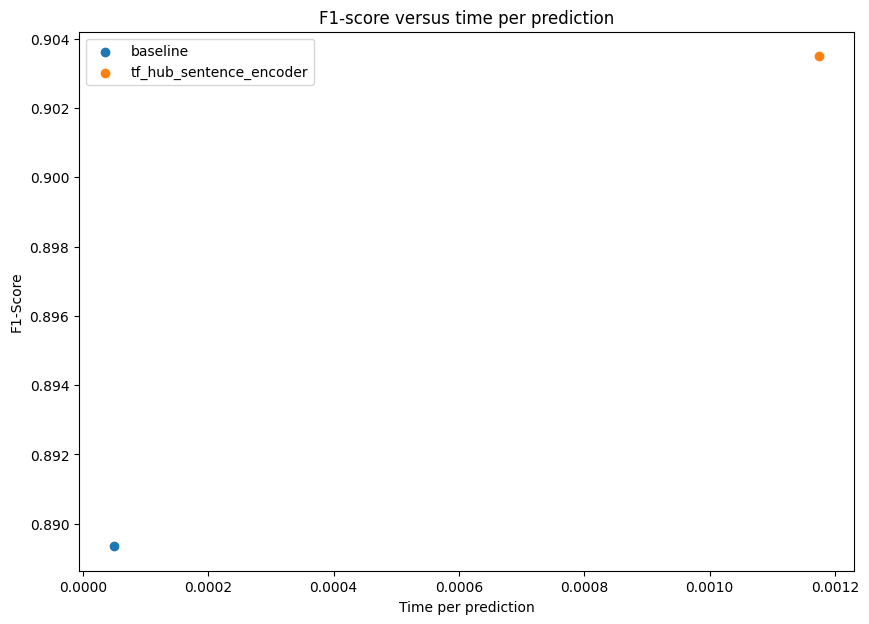

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Save the model
joblib.dump(model_6, 'model_6.pkl')


['model_6.pkl']

In [ ]:
# Save the model in SavedModel format
model_6.save("model_6_savedmodel")

In [ ]:
import shutil
shutil.make_archive('model_6_savedmodel', 'zip', '/content/model_6_savedmodel')


'/content/model_6_savedmodel.zip'

In [ ]:
from google.colab import files
files.download('model_6_savedmodel.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>